In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
# Importing the dataset
iris = pd.read_csv('Iris.csv')

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
iris.shape

(150, 6)

In [16]:
# Remove Id Column
iris.drop("Id", axis=1, inplace = True)

In [17]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

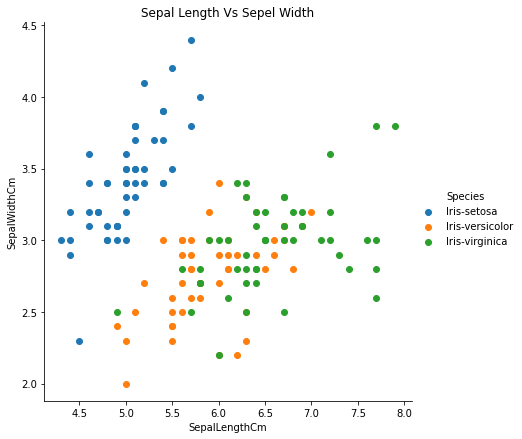

In [22]:
# By selecting two features SepalLengthCm and SepelWidthCm
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.title('Sepal Length Vs Sepel Width')
plt.show()

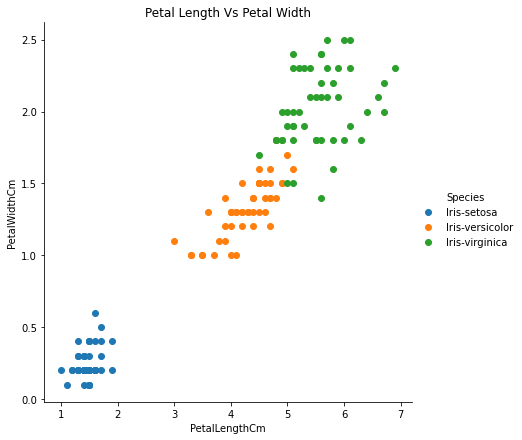

In [23]:
# By selecting two features PetalLengthCm and PetalWidthCm
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.title('Petal Length Vs Petal Width')
plt.show()

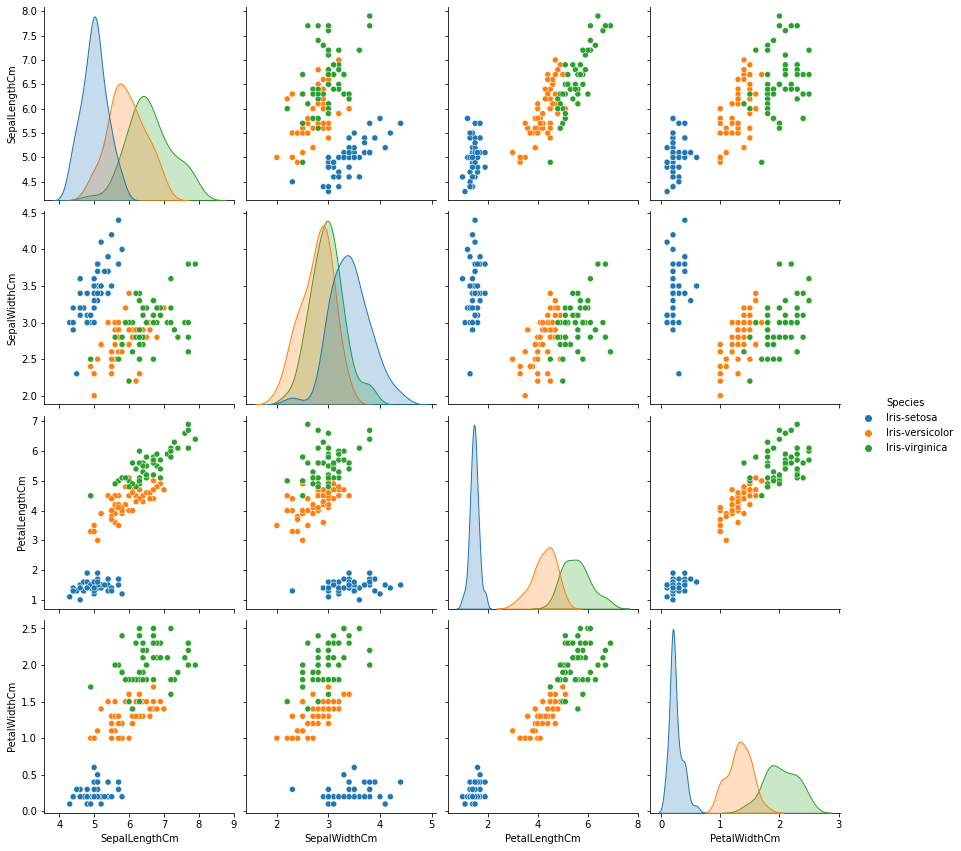

In [25]:
sns.pairplot(iris, hue="Species", height=3);
plt.show()

<AxesSubplot:>

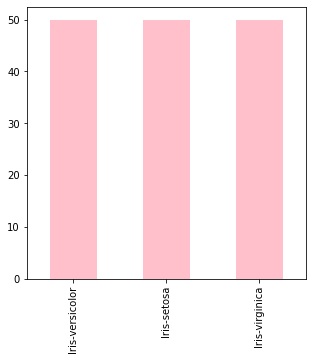

In [27]:
iris['Species'].value_counts().plot.bar(color = 'pink', figsize = (5, 5))

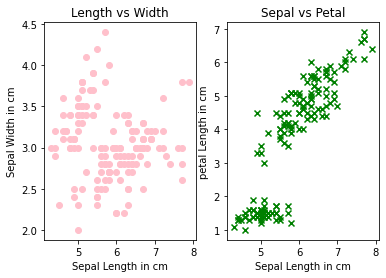

In [30]:
plt.subplot(1, 2, 1)
plt.scatter(x = iris['SepalLengthCm'], y = iris['SepalWidthCm'], color = 'pink', marker = 'o',)
plt.title('Length vs Width')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')

plt.subplot(1, 2, 2)
plt.scatter(x = iris['SepalLengthCm'], y = iris['PetalLengthCm'], color = 'green', marker = 'x',)
plt.title('Sepal vs Petal')
plt.xlabel('Sepal Length in cm')
plt.ylabel('petal Length in cm')
plt.show()

In [31]:
features = list(iris.columns)

print(features)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [37]:
X_p = iris.iloc[:,[2, 3]].values
y = iris.iloc[:, 4].values
X_s = iris.iloc[:,[0, 1]].values

In [38]:
X_p.shape

(150, 2)

In [39]:
X_s.shape

(150, 2)

In [40]:
y.shape

(150,)

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y
# Iris-setosa == 0
# Iris-versicolor == 1
# Iris-virginica == 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# Splitting the dataset into the Training set and Test set (Petal Lenth vs Petal Width)
from sklearn.model_selection import train_test_split
X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_p, y, test_size = 0.3, random_state = 0)

In [43]:
# Splitting the dataset into the Training set and Test set (Sepal Length vs Sepal Width)
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, y, test_size = 0.3, random_state = 0)

In [44]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [45]:
classifier.fit(X_trainp, y_trainp)

LogisticRegression(random_state=0)

In [46]:
y_predp = classifier.predict(X_testp)

In [47]:
y_predp

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [48]:
from sklearn import metrics
print('The accuracy of the Logistic Regression using Petals is:', metrics.accuracy_score(y_predp, y_testp))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777


In [49]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testp, y_predp))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


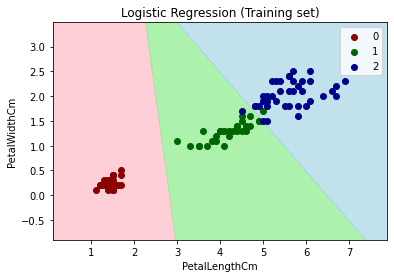

In [55]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_trainp, y_trainp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


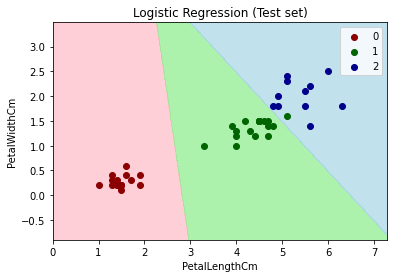

In [56]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_testp, y_testp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

In [57]:
# Fitting Logistic Regression to the Training set
classifier.fit(X_trains, y_trains)

LogisticRegression(random_state=0)

In [58]:
# Predicting the Test set results
y_preds = classifier.predict(X_tests)
y_preds

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [59]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(y_preds, y_tests))

The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [60]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_tests, y_preds))

[[16  0  0]
 [ 0 13  5]
 [ 0  3  8]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


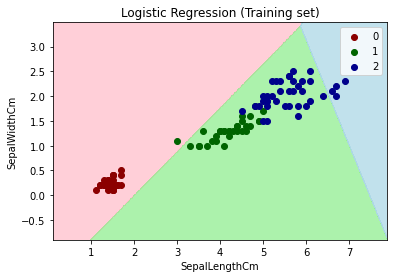

In [61]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_trainp, y_trainp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


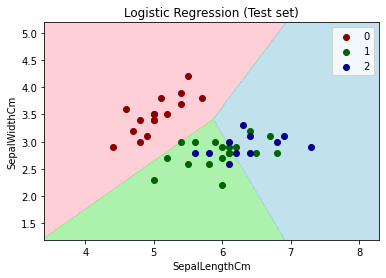

In [62]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_tests, y_tests
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [63]:
#SVM now
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

In [64]:
classifier.fit(X_trainp, y_trainp)

SVC(kernel='linear', random_state=0)

In [65]:
# Predicting the Test set results
y_predp = classifier.predict(X_testp)

In [66]:
y_predp

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [67]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of the SVM turns out to be: ', metrics.accuracy_score(y_predp, y_testp))

The accuracy of the SVM turns out to be:  0.9777777777777777


In [68]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testp, y_predp))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


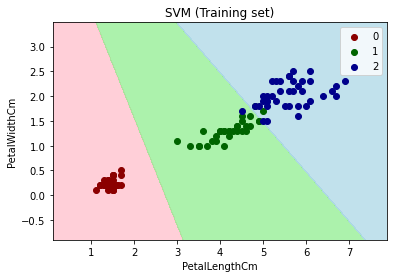

In [69]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_trainp, y_trainp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


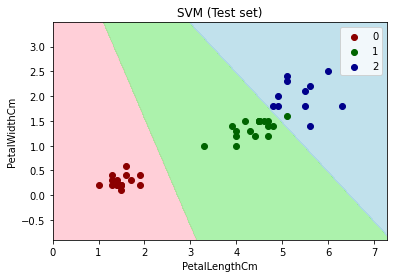

In [70]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_testp, y_testp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

In [71]:
# Fitting SVM to the Training set
classifier.fit(X_trains, y_trains)

SVC(kernel='linear', random_state=0)

In [72]:
# Predicting the Test set results
y_preds = classifier.predict(X_tests)
y_preds

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [73]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of the SVM using Sepals turns out to be:', metrics.accuracy_score(y_preds, y_tests))

The accuracy of the SVM using Sepals turns out to be: 0.8


In [74]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_tests, y_preds))

[[16  0  0]
 [ 0 13  5]
 [ 0  4  7]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


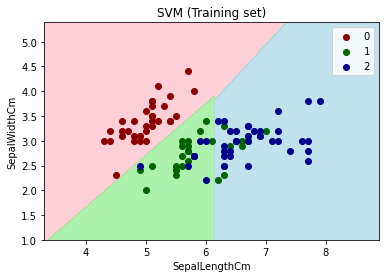

In [75]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_trains, y_trains
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


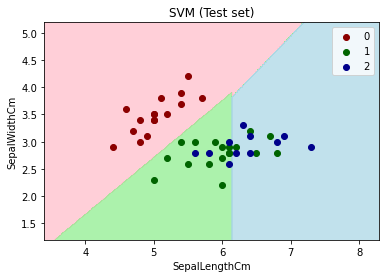

In [76]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_tests, y_tests
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [77]:
#KNN now
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [78]:
classifier.fit(X_trainp, y_trainp)

KNeighborsClassifier()

In [79]:
# Predicting the Test set results
y_predp = classifier.predict(X_testp)

In [80]:
y_predp

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [81]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN turns out to be: ', metrics.accuracy_score(y_predp, y_testp))

The accuracy of KNN turns out to be:  0.9777777777777777


In [82]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testp, y_predp))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


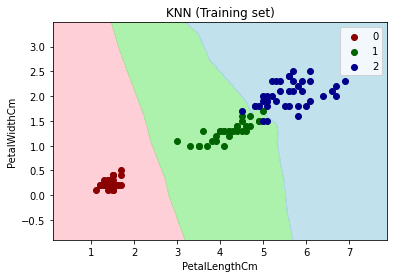

In [84]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_trainp, y_trainp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


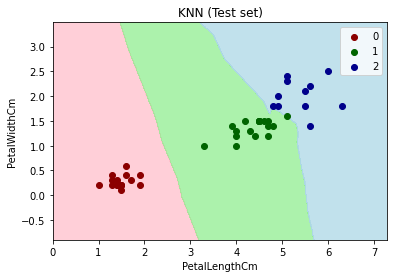

In [85]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_testp, y_testp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()


In [86]:
# Fitting KNN to the Training set
classifier.fit(X_trains, y_trains)

KNeighborsClassifier()

In [87]:
# Predicting the Test set results
y_preds = classifier.predict(X_tests)
y_preds

array([1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0,
       0])

In [88]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of the KNN using Sepals is:', metrics.accuracy_score(y_preds, y_tests))

The accuracy of the KNN using Sepals is: 0.7333333333333333


In [89]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_tests, y_preds))

[[16  0  0]
 [ 0  9  9]
 [ 0  3  8]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


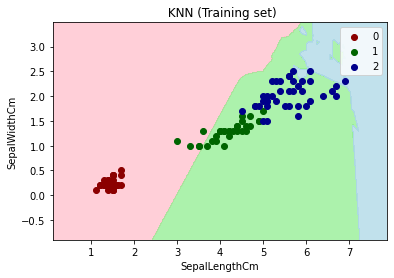

In [90]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_trainp, y_trainp
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title(' KNN (Training set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


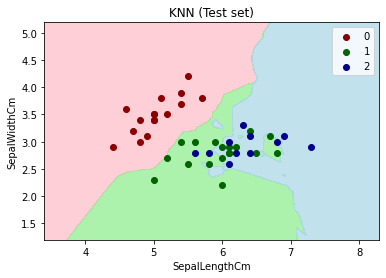

In [91]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_tests, y_tests
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen', 'darkblue'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

<b>Observations</b>

Using Petals over Sepal for training the data gives a much better accuracy.

Fin